# Trabajando con fechas y tiempos en Pandas

In [133]:
import pandas as pd
import datetime as dt

## Revisión del módulo `datetime` de Python
- El módulo `datetime` está incorporado dentro de Python.
- El alias común para el módulo `datetime` es `dt`.
- El módulo `datetime` incluye las clases `date` y `datetime` para representar fechas y fechas con tiempo.
- El constructor `date` acepta argumentos para año, mes y día. Python asigna por defecto el valor 0 a cualquier valor faltante.
- El constructor `datetime` acepta argumentos para año, mes, día, hora, minuto y segundo.


In [134]:
# Ejemplo del uso de datetime
someday = dt.date(2025, 12, 15)

print(f'year = {someday.year}')
print(f'month = {someday.month}')
print(f'day = {someday.day}')
print(type(someday))
sometime = dt.datetime(2025, 12, 15, 8, 13, 59)
print(f'year = {sometime.year}')
print(f'month = {sometime.month}')
print(f'day = {sometime.day}')
print(f'hour = {sometime.hour}')
print(f'minute = {sometime.minute}')
print(f'second = {sometime.second}')

year = 2025
month = 12
day = 15
<class 'datetime.date'>
year = 2025
month = 12
day = 15
hour = 8
minute = 13
second = 59


## Los objetos `Timestamp` y `DatetimeIndex`

- Pandas incluye varias clases relacionadas con fechas y horas.
- El **Timestamp** es similar al objeto **datetime** de Python (pero con funcionalidades ampliadas).
- Un **DatetimeIndex** es un índice de objetos **Timestamp**.
- El constructor de **Timestamp** acepta una cadena de texto, un objeto **datetime**, o argumentos equivalentes a los de la clase **datetime**.


In [135]:
pd.Timestamp(2027, 3, 12)

Timestamp('2027-03-12 00:00:00')

In [136]:
pd.Timestamp(2027, 3, 12, 18, 23, 49)


Timestamp('2027-03-12 18:23:49')

In [137]:
pd.Timestamp(dt.date(2028, 10, 23))


Timestamp('2028-10-23 00:00:00')

In [138]:
pd.Timestamp(dt.datetime(2028, 10, 23, 14, 35))


Timestamp('2028-10-23 14:35:00')

In [139]:
pd.Timestamp("2025-01-01")


Timestamp('2025-01-01 00:00:00')

In [140]:
pd.Timestamp("2025/04/01")


Timestamp('2025-04-01 00:00:00')

In [141]:
pd.Timestamp("2021-03-08 08:35:15")


Timestamp('2021-03-08 08:35:15')

In [142]:
pd.Series([pd.Timestamp("2021-03-08 08:35:15")]).iloc[0]


Timestamp('2021-03-08 08:35:15')

In [144]:
time_index = pd.DatetimeIndex(["2025-01-01", "2025-02-01", "2025-03-01"])
time_index


DatetimeIndex(['2025-01-01', '2025-02-01', '2025-03-01'], dtype='datetime64[ns]', freq=None)

In [147]:
pd.Series(time_index).iloc[0]

Timestamp('2025-01-01 00:00:00')

In [148]:
index = pd.DatetimeIndex([
    dt.date(2026, 1, 10),
    dt.date(2026, 2, 20)
])

print(index[0])
print(type(index[0]))

2026-01-10 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


## Crear un rango de fechas con la función `pd.date_range`

- La función `date_range` genera y devuelve un **DatetimeIndex** que contiene una secuencia de fechas.
- La función requiere 2 de los 3 siguientes parámetros: `start`, `end` y `period`.
- Si se proporcionan `start` y `end`, Pandas asumirá un intervalo/período diario.
- Cada elemento dentro de un **DatetimeIndex** es un **Timestamp**.


In [149]:
pd.date_range(start="2025-01-01", end="2025-01-07")

DatetimeIndex(['2025-01-01', '2025-01-02', '2025-01-03', '2025-01-04',
               '2025-01-05', '2025-01-06', '2025-01-07'],
              dtype='datetime64[ns]', freq='D')

In [150]:
pd.date_range(start="2025-01-01", end="2025-01-07", freq="D")


DatetimeIndex(['2025-01-01', '2025-01-02', '2025-01-03', '2025-01-04',
               '2025-01-05', '2025-01-06', '2025-01-07'],
              dtype='datetime64[ns]', freq='D')

In [151]:
pd.date_range(start="2025-01-01", end="2025-01-07", freq="2D")


DatetimeIndex(['2025-01-01', '2025-01-03', '2025-01-05', '2025-01-07'], dtype='datetime64[ns]', freq='2D')

In [152]:
pd.date_range(start="2025-01-01", end="2025-01-07", freq="B") # business days - Monday-Friday


DatetimeIndex(['2025-01-01', '2025-01-02', '2025-01-03', '2025-01-06',
               '2025-01-07'],
              dtype='datetime64[ns]', freq='B')

In [153]:
pd.date_range(start="2025-01-01", end="2025-01-31", freq="W")


DatetimeIndex(['2025-01-05', '2025-01-12', '2025-01-19', '2025-01-26'], dtype='datetime64[ns]', freq='W-SUN')

In [154]:
pd.date_range(start="2025-01-01", end="2025-01-31", freq="W-FRI")


DatetimeIndex(['2025-01-03', '2025-01-10', '2025-01-17', '2025-01-24',
               '2025-01-31'],
              dtype='datetime64[ns]', freq='W-FRI')

In [155]:
pd.date_range(start="2025-01-01", end="2025-01-31", freq="W-THU")


DatetimeIndex(['2025-01-02', '2025-01-09', '2025-01-16', '2025-01-23',
               '2025-01-30'],
              dtype='datetime64[ns]', freq='W-THU')

In [158]:
pd.date_range(start="2025-01-01", end="2025-01-31", freq="h")


DatetimeIndex(['2025-01-01 00:00:00', '2025-01-01 01:00:00',
               '2025-01-01 02:00:00', '2025-01-01 03:00:00',
               '2025-01-01 04:00:00', '2025-01-01 05:00:00',
               '2025-01-01 06:00:00', '2025-01-01 07:00:00',
               '2025-01-01 08:00:00', '2025-01-01 09:00:00',
               ...
               '2025-01-30 15:00:00', '2025-01-30 16:00:00',
               '2025-01-30 17:00:00', '2025-01-30 18:00:00',
               '2025-01-30 19:00:00', '2025-01-30 20:00:00',
               '2025-01-30 21:00:00', '2025-01-30 22:00:00',
               '2025-01-30 23:00:00', '2025-01-31 00:00:00'],
              dtype='datetime64[ns]', length=721, freq='h')

In [159]:
pd.date_range(start="2025-01-01", end="2025-01-31", freq="6h")


DatetimeIndex(['2025-01-01 00:00:00', '2025-01-01 06:00:00',
               '2025-01-01 12:00:00', '2025-01-01 18:00:00',
               '2025-01-02 00:00:00', '2025-01-02 06:00:00',
               '2025-01-02 12:00:00', '2025-01-02 18:00:00',
               '2025-01-03 00:00:00', '2025-01-03 06:00:00',
               ...
               '2025-01-28 18:00:00', '2025-01-29 00:00:00',
               '2025-01-29 06:00:00', '2025-01-29 12:00:00',
               '2025-01-29 18:00:00', '2025-01-30 00:00:00',
               '2025-01-30 06:00:00', '2025-01-30 12:00:00',
               '2025-01-30 18:00:00', '2025-01-31 00:00:00'],
              dtype='datetime64[ns]', length=121, freq='6h')

In [160]:
pd.date_range(start="2025-01-01", end="2025-12-31", freq="ME")


DatetimeIndex(['2025-01-31', '2025-02-28', '2025-03-31', '2025-04-30',
               '2025-05-31', '2025-06-30', '2025-07-31', '2025-08-31',
               '2025-09-30', '2025-10-31', '2025-11-30', '2025-12-31'],
              dtype='datetime64[ns]', freq='ME')

In [161]:
pd.date_range(start="2025-01-01", end="2025-12-31", freq="MS")


DatetimeIndex(['2025-01-01', '2025-02-01', '2025-03-01', '2025-04-01',
               '2025-05-01', '2025-06-01', '2025-07-01', '2025-08-01',
               '2025-09-01', '2025-10-01', '2025-11-01', '2025-12-01'],
              dtype='datetime64[ns]', freq='MS')

In [162]:
pd.date_range(start="2025-01-01", end="2050-12-31", freq="YE")


DatetimeIndex(['2025-12-31', '2026-12-31', '2027-12-31', '2028-12-31',
               '2029-12-31', '2030-12-31', '2031-12-31', '2032-12-31',
               '2033-12-31', '2034-12-31', '2035-12-31', '2036-12-31',
               '2037-12-31', '2038-12-31', '2039-12-31', '2040-12-31',
               '2041-12-31', '2042-12-31', '2043-12-31', '2044-12-31',
               '2045-12-31', '2046-12-31', '2047-12-31', '2048-12-31',
               '2049-12-31', '2050-12-31'],
              dtype='datetime64[ns]', freq='YE-DEC')

In [163]:
pd.date_range(start="2012-09-09", freq="D", periods=25)


DatetimeIndex(['2012-09-09', '2012-09-10', '2012-09-11', '2012-09-12',
               '2012-09-13', '2012-09-14', '2012-09-15', '2012-09-16',
               '2012-09-17', '2012-09-18', '2012-09-19', '2012-09-20',
               '2012-09-21', '2012-09-22', '2012-09-23', '2012-09-24',
               '2012-09-25', '2012-09-26', '2012-09-27', '2012-09-28',
               '2012-09-29', '2012-09-30', '2012-10-01', '2012-10-02',
               '2012-10-03'],
              dtype='datetime64[ns]', freq='D')

In [164]:
pd.date_range(start="2012-09-09", freq="3D", periods=40)


DatetimeIndex(['2012-09-09', '2012-09-12', '2012-09-15', '2012-09-18',
               '2012-09-21', '2012-09-24', '2012-09-27', '2012-09-30',
               '2012-10-03', '2012-10-06', '2012-10-09', '2012-10-12',
               '2012-10-15', '2012-10-18', '2012-10-21', '2012-10-24',
               '2012-10-27', '2012-10-30', '2012-11-02', '2012-11-05',
               '2012-11-08', '2012-11-11', '2012-11-14', '2012-11-17',
               '2012-11-20', '2012-11-23', '2012-11-26', '2012-11-29',
               '2012-12-02', '2012-12-05', '2012-12-08', '2012-12-11',
               '2012-12-14', '2012-12-17', '2012-12-20', '2012-12-23',
               '2012-12-26', '2012-12-29', '2013-01-01', '2013-01-04'],
              dtype='datetime64[ns]', freq='3D')

In [165]:
pd.date_range(start="2012-09-09", freq="B", periods=180)


DatetimeIndex(['2012-09-10', '2012-09-11', '2012-09-12', '2012-09-13',
               '2012-09-14', '2012-09-17', '2012-09-18', '2012-09-19',
               '2012-09-20', '2012-09-21',
               ...
               '2013-05-06', '2013-05-07', '2013-05-08', '2013-05-09',
               '2013-05-10', '2013-05-13', '2013-05-14', '2013-05-15',
               '2013-05-16', '2013-05-17'],
              dtype='datetime64[ns]', length=180, freq='B')

In [166]:
pd.date_range(end="2013-10-31", freq="D", periods=20)


DatetimeIndex(['2013-10-12', '2013-10-13', '2013-10-14', '2013-10-15',
               '2013-10-16', '2013-10-17', '2013-10-18', '2013-10-19',
               '2013-10-20', '2013-10-21', '2013-10-22', '2013-10-23',
               '2013-10-24', '2013-10-25', '2013-10-26', '2013-10-27',
               '2013-10-28', '2013-10-29', '2013-10-30', '2013-10-31'],
              dtype='datetime64[ns]', freq='D')

In [167]:
pd.date_range(end="2016-12-31", freq="B", periods=75)


DatetimeIndex(['2016-09-19', '2016-09-20', '2016-09-21', '2016-09-22',
               '2016-09-23', '2016-09-26', '2016-09-27', '2016-09-28',
               '2016-09-29', '2016-09-30', '2016-10-03', '2016-10-04',
               '2016-10-05', '2016-10-06', '2016-10-07', '2016-10-10',
               '2016-10-11', '2016-10-12', '2016-10-13', '2016-10-14',
               '2016-10-17', '2016-10-18', '2016-10-19', '2016-10-20',
               '2016-10-21', '2016-10-24', '2016-10-25', '2016-10-26',
               '2016-10-27', '2016-10-28', '2016-10-31', '2016-11-01',
               '2016-11-02', '2016-11-03', '2016-11-04', '2016-11-07',
               '2016-11-08', '2016-11-09', '2016-11-10', '2016-11-11',
               '2016-11-14', '2016-11-15', '2016-11-16', '2016-11-17',
               '2016-11-18', '2016-11-21', '2016-11-22', '2016-11-23',
               '2016-11-24', '2016-11-25', '2016-11-28', '2016-11-29',
               '2016-11-30', '2016-12-01', '2016-12-02', '2016-12-05',
      

In [168]:
pd.date_range(end="1991-04-12", freq="W-FRI", periods=75)

DatetimeIndex(['1989-11-10', '1989-11-17', '1989-11-24', '1989-12-01',
               '1989-12-08', '1989-12-15', '1989-12-22', '1989-12-29',
               '1990-01-05', '1990-01-12', '1990-01-19', '1990-01-26',
               '1990-02-02', '1990-02-09', '1990-02-16', '1990-02-23',
               '1990-03-02', '1990-03-09', '1990-03-16', '1990-03-23',
               '1990-03-30', '1990-04-06', '1990-04-13', '1990-04-20',
               '1990-04-27', '1990-05-04', '1990-05-11', '1990-05-18',
               '1990-05-25', '1990-06-01', '1990-06-08', '1990-06-15',
               '1990-06-22', '1990-06-29', '1990-07-06', '1990-07-13',
               '1990-07-20', '1990-07-27', '1990-08-03', '1990-08-10',
               '1990-08-17', '1990-08-24', '1990-08-31', '1990-09-07',
               '1990-09-14', '1990-09-21', '1990-09-28', '1990-10-05',
               '1990-10-12', '1990-10-19', '1990-10-26', '1990-11-02',
               '1990-11-09', '1990-11-16', '1990-11-23', '1990-11-30',
      

## El atributo `dt`

- El atributo `dt` revela un objeto `DatetimeProperties` con atributos y métodos para trabajar con fechas y horas. Es similar al atributo `str` para métodos de cadenas de texto.
- El objeto `DatetimeProperties` tiene atributos como `day`, `month` y `year` para mostrar información sobre cada fecha en la **Series**.
- El método `day_name` devuelve el nombmre del día de la semana en texto.
- Atributos como `is_month_end` e `is_quarter_start` devuelven una **Series** booleana.


In [169]:
bunch_of_dates = pd.Series(pd.date_range(start="2000-01-01", end="2020-12-31", freq="24D 3h"))

bunch_of_dates.head()

0   2000-01-01 00:00:00
1   2000-01-25 03:00:00
2   2000-02-18 06:00:00
3   2000-03-13 09:00:00
4   2000-04-06 12:00:00
dtype: datetime64[ns]

In [171]:
bunch_of_dates.dt.day


0       1
1      25
2      18
3      13
4       6
       ..
313     3
314    27
315    21
316    14
317     8
Length: 318, dtype: int32

In [172]:
bunch_of_dates.dt.month


0       1
1       1
2       2
3       3
4       4
       ..
313     9
314     9
315    10
316    11
317    12
Length: 318, dtype: int32

In [173]:
bunch_of_dates.dt.year


0      2000
1      2000
2      2000
3      2000
4      2000
       ... 
313    2020
314    2020
315    2020
316    2020
317    2020
Length: 318, dtype: int32

In [174]:
bunch_of_dates.dt.hour


0       0
1       3
2       6
3       9
4      12
       ..
313     3
314     6
315     9
316    12
317    15
Length: 318, dtype: int32

In [63]:
bunch_of_dates.dt.day_of_year


0        1
1       25
2       49
3       73
4       97
      ... 
313    247
314    271
315    295
316    319
317    343
Length: 318, dtype: int32

In [175]:
bunch_of_dates.dt.day_name()


0       Saturday
1        Tuesday
2         Friday
3         Monday
4       Thursday
         ...    
313     Thursday
314       Sunday
315    Wednesday
316     Saturday
317      Tuesday
Length: 318, dtype: object

In [176]:
bunch_of_dates.dt.is_month_end


0      False
1      False
2      False
3      False
4      False
       ...  
313    False
314    False
315    False
316    False
317    False
Length: 318, dtype: bool

In [66]:
bunch_of_dates.dt.is_month_start


0       True
1      False
2      False
3      False
4      False
       ...  
313    False
314    False
315    False
316    False
317    False
Length: 318, dtype: bool

In [67]:
bunch_of_dates[bunch_of_dates.dt.is_quarter_start]

0     2000-01-01 00:00:00
106   2007-01-01 06:00:00
212   2014-01-01 12:00:00
299   2019-10-01 09:00:00
dtype: datetime64[ns]

## Selección de filas en un DataFrame con un `DateTimeIndex`

- El accesor `iloc` está disponible para la extracción basada en la posición del índice.
- El accesor `loc` acepta cadenas de texto o **Timestamps** para extraer por etiqueta/valor de índice. Nota: los objetos `datetime` de Python no funcionarán directamente.
- Puedes usar el corte de listas (slicing) para extraer una secuencia de fechas. El método `truncate` es otra alternativa.


In [177]:
# Instalar un paquete para api de yahoo finance
!pip install yfinance

In [192]:
import yfinance as yf

# Dynamic ticker symbol
ticker = "NTDOY"  # You can make this a variable input

# Download historical stock data
stocks = yf.download(ticker, start="1962-01-01", end="2024-12-31")

# Show the first few rows
print(stocks.head())

[*********************100%***********************]  1 of 1 completed

Price          Close      High       Low      Open   Volume
Ticker         NTDOY     NTDOY     NTDOY     NTDOY    NTDOY
Date                                                       
1996-11-18  1.710279  1.710279  1.639018  1.710279   406500
1996-11-19  1.710279  1.710279  1.639018  1.710279   690500
1996-11-20  1.722156  1.757787  1.615264  1.722156   280000
1996-11-21  1.710279  1.734033  1.627141  1.710279   458500
1996-11-22  1.734033  1.757787  1.662772  1.734033  1000500


In [193]:
stocks

Price,Close,High,Low,Open,Volume
Ticker,NTDOY,NTDOY,NTDOY,NTDOY,NTDOY
Date,,,,,
1996-11-18,1.710279,1.710279,1.639018,1.710279,406500
1996-11-19,1.710279,1.710279,1.639018,1.710279,690500
1996-11-20,1.722156,1.757787,1.615264,1.722156,280000
1996-11-21,1.710279,1.734033,1.627141,1.710279,458500
1996-11-22,1.734033,1.757787,1.662772,1.734033,1000500
...,...,...,...,...,...
2024-12-23,14.650000,14.800000,14.520000,14.750000,1707600
2024-12-24,14.650000,14.740000,14.530000,14.540000,366700


In [194]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7075 entries, 1996-11-18 to 2024-12-30
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   (Close, NTDOY)   7075 non-null   float64
 1   (High, NTDOY)    7075 non-null   float64
 2   (Low, NTDOY)     7075 non-null   float64
 3   (Open, NTDOY)    7075 non-null   float64
 4   (Volume, NTDOY)  7075 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 331.6 KB


In [184]:
stocks.iloc[300]


Price   Ticker
Close   NTDOY          2.422896
High    NTDOY          2.470403
Low     NTDOY          2.375388
Open    NTDOY          2.422896
Volume  NTDOY     124500.000000
Name: 1998-01-28 00:00:00, dtype: float64

In [185]:
stocks.loc["2014-03-04"]


Price   Ticker
Close   NTDOY          3.112
High    NTDOY          3.126
Low     NTDOY          3.096
Open    NTDOY          3.104
Volume  NTDOY     891000.000
Name: 2014-03-04 00:00:00, dtype: float64

In [186]:
stocks.loc[pd.Timestamp(2014, 3, 4)]


Price   Ticker
Close   NTDOY          3.112
High    NTDOY          3.126
Low     NTDOY          3.096
Open    NTDOY          3.104
Volume  NTDOY     891000.000
Name: 2014-03-04 00:00:00, dtype: float64

In [195]:
import matplotlib.pyplot as plt
import seaborn as sns

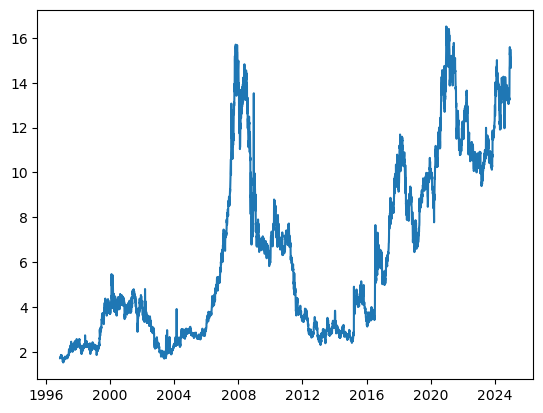

In [190]:
plt.plot(stocks.index, stocks["High"])
plt.show()

<Axes: xlabel='Date', ylabel="('High', 'NTDOY')">

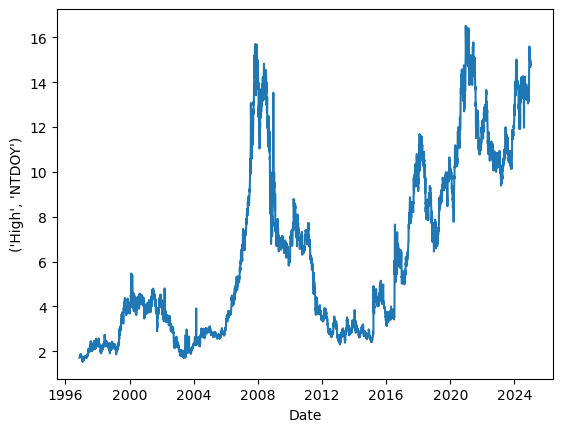

In [204]:
sns.lineplot(data=stocks, x=stocks.index, y=('High','NTDOY'))

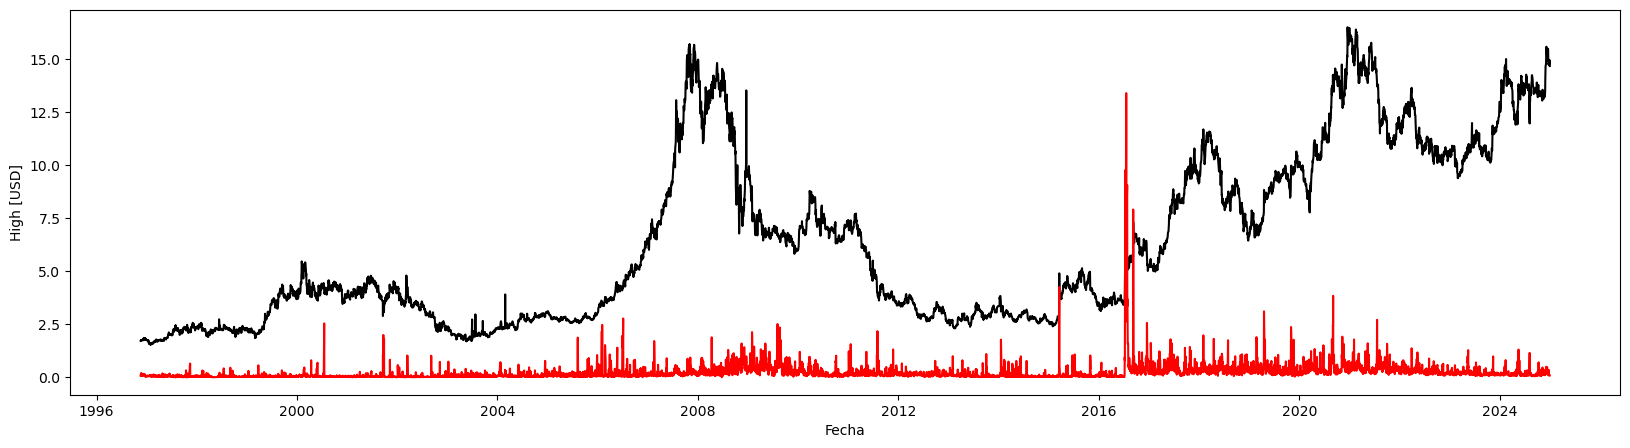

In [224]:
fig = plt.figure(figsize=(20,5))

ax = fig.add_subplot(1,1,1)

# Agregarle plots
ax.plot(stocks.index, stocks["High"], color='black', linestyle='-')
ax.plot(stocks.index, stocks["Volume"]/5000000, color='red', linestyle='-')

ax.set_xlabel('Fecha')
ax.set_ylabel('High [USD]')

plt.show()

In [225]:
stocks.loc["2014-03-04":"2014-12-31"]


Price,Close,High,Low,Open,Volume
Ticker,NTDOY,NTDOY,NTDOY,NTDOY,NTDOY
Date,,,,,
2014-03-04,3.112,3.126,3.096,3.104,891000
2014-03-05,3.056,3.090,3.056,3.090,39500
2014-03-06,3.060,3.090,3.060,3.082,756500
2014-03-07,3.046,3.052,3.046,3.046,101500
2014-03-10,2.974,3.010,2.970,3.010,856000
...,...,...,...,...,...
2014-12-24,2.662,2.670,2.650,2.670,37000
2014-12-26,2.666,2.680,2.652,2.652,136500


In [226]:
stocks.loc[pd.Timestamp(2014, 3, 4):pd.Timestamp(2014, 12, 31)]


Price,Close,High,Low,Open,Volume
Ticker,NTDOY,NTDOY,NTDOY,NTDOY,NTDOY
Date,,,,,
2014-03-04,3.112,3.126,3.096,3.104,891000
2014-03-05,3.056,3.090,3.056,3.090,39500
2014-03-06,3.060,3.090,3.060,3.082,756500
2014-03-07,3.046,3.052,3.046,3.046,101500
2014-03-10,2.974,3.010,2.970,3.010,856000
...,...,...,...,...,...
2014-12-24,2.662,2.670,2.650,2.670,37000
2014-12-26,2.666,2.680,2.652,2.652,136500


In [227]:
stocks.truncate("2014-03-04", "2014-12-31")


Price,Close,High,Low,Open,Volume
Ticker,NTDOY,NTDOY,NTDOY,NTDOY,NTDOY
Date,,,,,
2014-03-04,3.112,3.126,3.096,3.104,891000
2014-03-05,3.056,3.090,3.056,3.090,39500
2014-03-06,3.060,3.090,3.060,3.082,756500
2014-03-07,3.046,3.052,3.046,3.046,101500
2014-03-10,2.974,3.010,2.970,3.010,856000
...,...,...,...,...,...
2014-12-24,2.662,2.670,2.650,2.670,37000
2014-12-26,2.666,2.680,2.652,2.652,136500


In [231]:
stocks.loc["2014-03-04", ("Close","NTDOY")] # El dataframe tiene elementos multiindex en las columnas


np.float64(3.111999988555908)

In [232]:
stocks.loc["2014-03-04", ("High","NTDOY"):("Close","NTDOY")]


Series([], Name: 2014-03-04 00:00:00, dtype: float64)

In [233]:
stocks.loc[pd.Timestamp(2014, 3, 4):pd.Timestamp(2014, 12, 31), ("High","NTDOY"):("Close","NTDOY")]

Date
2014-03-04
2014-03-05
2014-03-06
2014-03-07
2014-03-10
...
2014-12-24
2014-12-26
2014-12-29
2014-12-30


In [234]:
import yfinance as yf

# Dynamic ticker symbol
ticker = "NTDOY"  # You can make this a variable input

# Download historical stock data
stocks = yf.download(ticker, start="1962-01-01", end="2024-12-31")
stocks.columns = stocks.columns.droplevel(1)

# Show the first few rows
print(stocks.head())

[*********************100%***********************]  1 of 1 completed

Price          Close      High       Low      Open   Volume
Date                                                       
1996-11-18  1.710279  1.710279  1.639018  1.710279   406500
1996-11-19  1.710279  1.710279  1.639018  1.710279   690500
1996-11-20  1.722156  1.757787  1.615264  1.722156   280000
1996-11-21  1.710279  1.734033  1.627141  1.710279   458500
1996-11-22  1.734033  1.757787  1.662772  1.734033  1000500


In [235]:
stocks

Price,Close,High,Low,Open,Volume
Date,,,,,
1996-11-18,1.710279,1.710279,1.639018,1.710279,406500
1996-11-19,1.710279,1.710279,1.639018,1.710279,690500
1996-11-20,1.722156,1.757787,1.615264,1.722156,280000
1996-11-21,1.710279,1.734033,1.627141,1.710279,458500
1996-11-22,1.734033,1.757787,1.662772,1.734033,1000500
...,...,...,...,...,...
2024-12-23,14.650000,14.800000,14.520000,14.750000,1707600
2024-12-24,14.650000,14.740000,14.530000,14.540000,366700
2024-12-26,14.640000,14.780000,14.630000,14.640000,413200


In [236]:
stocks.loc["2014-03-04", "Close"]

np.float64(3.111999988555908)

In [237]:
stocks.loc["2014-03-04", "Close":"High"]

Price
Close    3.112
High     3.126
Name: 2014-03-04 00:00:00, dtype: float64

In [238]:
stocks.loc[pd.Timestamp(2014, 3, 4):pd.Timestamp(2014, 12, 31), "Close":"High"]

Price,Close,High
Date,,
2014-03-04,3.112,3.126
2014-03-05,3.056,3.090
2014-03-06,3.060,3.090
2014-03-07,3.046,3.052
2014-03-10,2.974,3.010
...,...,...
2014-12-24,2.662,2.670
2014-12-26,2.666,2.680
2014-12-29,2.618,2.630


## El objeto `DateOffset`

- Un objeto **DateOffset** añade tiempo a un **Timestamp** para obtener un nuevo **Timestamp**.
- El constructor de **DateOffset** acepta parámetros como `days`, `weeks`, `months`, `years`, entre otros.
- Podemos pasar un objeto **DateOffset** al parámetro `freq` de la función `pd.date_range`.


In [258]:
import yfinance as yf

# Dynamic ticker symbol
ticker = "NTDOY"  # You can make this a variable input

# Download historical stock data
stocks = yf.download(ticker, start="1962-01-01", end="2024-12-31")
stocks.columns = stocks.columns.droplevel(1)

# Show the first few rows
print(stocks.head())

[*********************100%***********************]  1 of 1 completed

Price          Close      High       Low      Open   Volume
Date                                                       
1996-11-18  1.710279  1.710279  1.639018  1.710279   406500
1996-11-19  1.710279  1.710279  1.639018  1.710279   690500
1996-11-20  1.722156  1.757787  1.615264  1.722156   280000
1996-11-21  1.710279  1.734033  1.627141  1.710279   458500
1996-11-22  1.734033  1.757787  1.662772  1.734033  1000500


In [259]:
stocks.index + pd.DateOffset(days=5)


DatetimeIndex(['1996-11-23', '1996-11-24', '1996-11-25', '1996-11-26',
               '1996-11-27', '1996-11-30', '1996-12-01', '1996-12-02',
               '1996-12-04', '1996-12-07',
               ...
               '2024-12-21', '2024-12-22', '2024-12-23', '2024-12-24',
               '2024-12-25', '2024-12-28', '2024-12-29', '2024-12-31',
               '2025-01-01', '2025-01-04'],
              dtype='datetime64[ns]', name='Date', length=7075, freq=None)

In [260]:
stocks.index - pd.DateOffset(days=5)


DatetimeIndex(['1996-11-13', '1996-11-14', '1996-11-15', '1996-11-16',
               '1996-11-17', '1996-11-20', '1996-11-21', '1996-11-22',
               '1996-11-24', '1996-11-27',
               ...
               '2024-12-11', '2024-12-12', '2024-12-13', '2024-12-14',
               '2024-12-15', '2024-12-18', '2024-12-19', '2024-12-21',
               '2024-12-22', '2024-12-25'],
              dtype='datetime64[ns]', name='Date', length=7075, freq=None)

In [261]:
stocks.index + pd.DateOffset(months=3)


DatetimeIndex(['1997-02-18', '1997-02-19', '1997-02-20', '1997-02-21',
               '1997-02-22', '1997-02-25', '1997-02-26', '1997-02-27',
               '1997-02-28', '1997-03-02',
               ...
               '2025-03-16', '2025-03-17', '2025-03-18', '2025-03-19',
               '2025-03-20', '2025-03-23', '2025-03-24', '2025-03-26',
               '2025-03-27', '2025-03-30'],
              dtype='datetime64[ns]', name='Date', length=7075, freq=None)

In [262]:
stocks.index - pd.DateOffset(years=1)


DatetimeIndex(['1995-11-18', '1995-11-19', '1995-11-20', '1995-11-21',
               '1995-11-22', '1995-11-25', '1995-11-26', '1995-11-27',
               '1995-11-29', '1995-12-02',
               ...
               '2023-12-16', '2023-12-17', '2023-12-18', '2023-12-19',
               '2023-12-20', '2023-12-23', '2023-12-24', '2023-12-26',
               '2023-12-27', '2023-12-30'],
              dtype='datetime64[ns]', name='Date', length=7075, freq=None)

In [263]:
stocks.index + pd.DateOffset(hours=7)


DatetimeIndex(['1996-11-18 07:00:00', '1996-11-19 07:00:00',
               '1996-11-20 07:00:00', '1996-11-21 07:00:00',
               '1996-11-22 07:00:00', '1996-11-25 07:00:00',
               '1996-11-26 07:00:00', '1996-11-27 07:00:00',
               '1996-11-29 07:00:00', '1996-12-02 07:00:00',
               ...
               '2024-12-16 07:00:00', '2024-12-17 07:00:00',
               '2024-12-18 07:00:00', '2024-12-19 07:00:00',
               '2024-12-20 07:00:00', '2024-12-23 07:00:00',
               '2024-12-24 07:00:00', '2024-12-26 07:00:00',
               '2024-12-27 07:00:00', '2024-12-30 07:00:00'],
              dtype='datetime64[ns]', name='Date', length=7075, freq=None)

In [264]:

stocks.index + pd.DateOffset(years=1, months=3, days=2, hours=14, minutes=23, seconds=12)

DatetimeIndex(['1998-02-20 14:23:12', '1998-02-21 14:23:12',
               '1998-02-22 14:23:12', '1998-02-23 14:23:12',
               '1998-02-24 14:23:12', '1998-02-27 14:23:12',
               '1998-02-28 14:23:12', '1998-03-01 14:23:12',
               '1998-03-02 14:23:12', '1998-03-04 14:23:12',
               ...
               '2026-03-18 14:23:12', '2026-03-19 14:23:12',
               '2026-03-20 14:23:12', '2026-03-21 14:23:12',
               '2026-03-22 14:23:12', '2026-03-25 14:23:12',
               '2026-03-26 14:23:12', '2026-03-28 14:23:12',
               '2026-03-29 14:23:12', '2026-04-01 14:23:12'],
              dtype='datetime64[ns]', name='Date', length=7075, freq=None)

### Ejercicio

Encontrar el valor de la acción en cada día de su cumpleaños, cada año.

In [273]:
birthday_range = pd.date_range(start="1998-11-17", end="2025-03-14", freq=pd.DateOffset(years=1))
birthday_range

DatetimeIndex(['1998-11-17', '1999-11-17', '2000-11-17', '2001-11-17',
               '2002-11-17', '2003-11-17', '2004-11-17', '2005-11-17',
               '2006-11-17', '2007-11-17', '2008-11-17', '2009-11-17',
               '2010-11-17', '2011-11-17', '2012-11-17', '2013-11-17',
               '2014-11-17', '2015-11-17', '2016-11-17', '2017-11-17',
               '2018-11-17', '2019-11-17', '2020-11-17', '2021-11-17',
               '2022-11-17', '2023-11-17', '2024-11-17'],
              dtype='datetime64[ns]', freq='<DateOffset: years=1>')

In [274]:
birthday_series = pd.Series(birthday_range)
birthday_series

0    1998-11-17
1    1999-11-17
2    2000-11-17
3    2001-11-17
4    2002-11-17
5    2003-11-17
6    2004-11-17
7    2005-11-17
8    2006-11-17
9    2007-11-17
10   2008-11-17
11   2009-11-17
12   2010-11-17
13   2011-11-17
14   2012-11-17
15   2013-11-17
16   2014-11-17
17   2015-11-17
18   2016-11-17
19   2017-11-17
20   2018-11-17
21   2019-11-17
22   2020-11-17
23   2021-11-17
24   2022-11-17
25   2023-11-17
26   2024-11-17
dtype: datetime64[ns]

In [279]:
stocks

Price,Close,High,Low,Open,Volume
Date,,,,,
1996-11-18,1.710279,1.710279,1.639018,1.710279,406500
1996-11-19,1.710279,1.710279,1.639018,1.710279,690500
1996-11-20,1.722156,1.757787,1.615264,1.722156,280000
1996-11-21,1.710279,1.734033,1.627141,1.710279,458500
1996-11-22,1.734033,1.757787,1.662772,1.734033,1000500
...,...,...,...,...,...
2024-12-23,14.650000,14.800000,14.520000,14.750000,1707600
2024-12-24,14.650000,14.740000,14.530000,14.540000,366700
2024-12-26,14.640000,14.780000,14.630000,14.640000,413200


In [283]:
is_birthday = stocks.index.isin(birthday_series)
is_birthday

array([False, False, False, ..., False, False, False])

In [284]:
stocks_birthday = stocks[is_birthday]
stocks_birthday

Price,Close,High,Low,Open,Volume
Date,,,,,
1998-11-17,2.256618,2.304126,2.209111,2.256618,68500
1999-11-17,4.156930,4.275699,4.133176,4.156930,218000
2000-11-17,4.133175,4.228190,4.038159,4.133175,94000
2003-11-17,2.025337,2.044719,2.005956,2.025337,200000
2004-11-17,2.983140,2.983140,2.934075,2.983140,212500
2005-11-17,2.710790,2.750508,2.710790,2.710790,2617500
2006-11-17,5.590000,5.590000,5.500000,5.590000,596000
2008-11-17,7.702000,7.930000,7.680000,7.830000,1280000
2009-11-17,6.360000,6.410000,6.330000,6.410000,428000


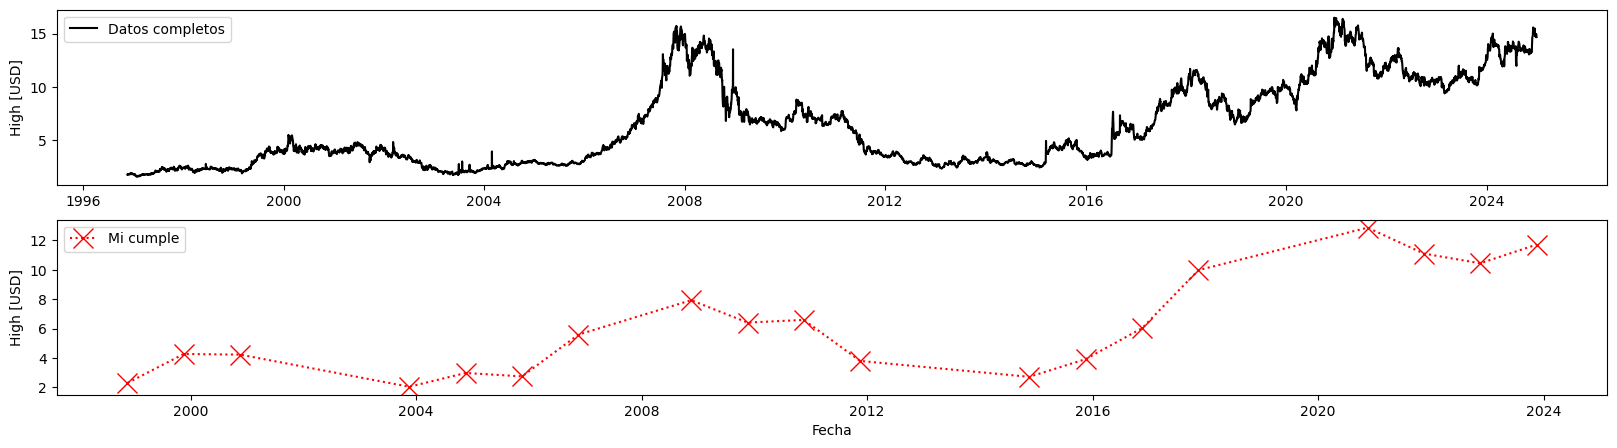

In [ ]:
fig = plt.figure(figsize=(20,5))

ax1 = fig.add_subplot(2,1,1)
ax1.set_ylabel('High [USD]')
ax1.plot(stocks.index, stocks['High'], color='black', linestyle='-', label='Datos completos')

ax2 = fig.add_subplot(2,1,2)
ax2.set_xlabel('Fecha')
ax2.set_ylabel('High [USD]')
ax2.plot(stocks_birthday.index, stocks_birthday['High'], color='red', linestyle='dotted', marker='x', markersize=14, label='Mi cumple')

ax1.legend()
ax2.legend()
plt.show()

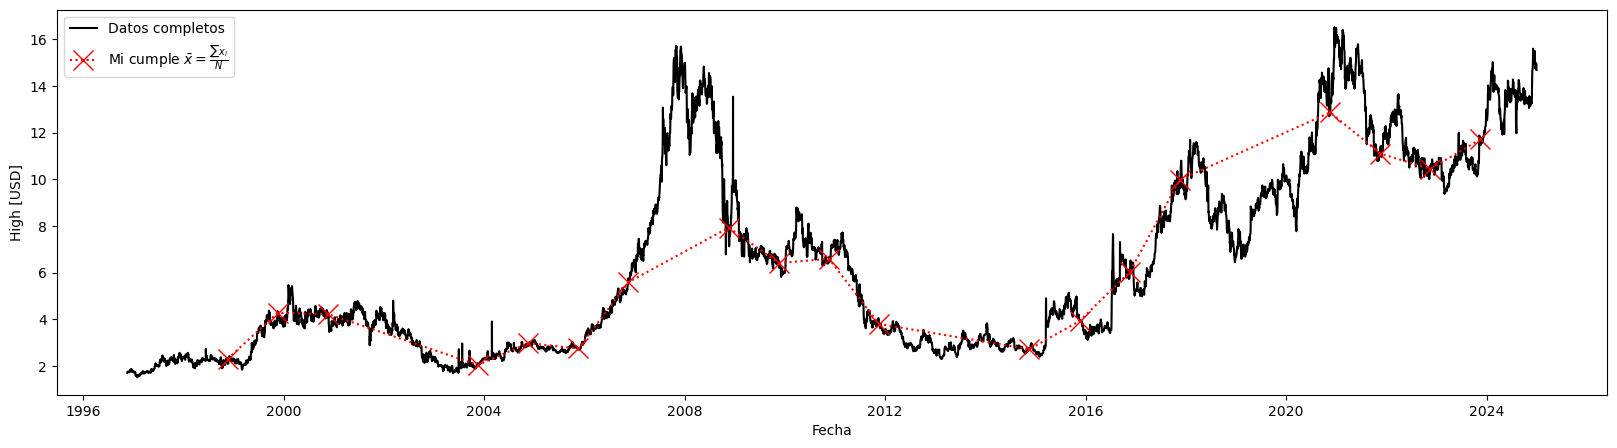

In [320]:
fig = plt.figure(figsize=(20,5))

ax1 = fig.add_subplot(1,1,1)
ax1.set_ylabel('High [USD]')
ax1.plot(stocks.index, stocks['High'], color='black', linestyle='-', label='Datos completos')

ax1.set_xlabel('Fecha')
ax1.set_ylabel('High [USD]')
ax1.plot(stocks_birthday.index, stocks_birthday['High'], color='red', linestyle='dotted', marker='x', markersize=14, label=r'Mi cumple $\bar{x} = \frac{\sum x_i}{N}$')

#ax1.axvline(x=stocks_birthday.index)

ax1.annotate(text='hola', xy=(2004,20), xytext=(2004,20), size=40)

ax1.legend()

plt.savefig("stocks_birthday.pdf")
plt.show()

## Offsets de fecha especializados

- Pandas incluye offsets de fecha más especializados en `pd.tseries.offsets`.
- Podemos agregar diferentes cantidades de tiempo a cada fecha (por ejemplo, fin de mes, fin de trimestre, inicio de año).


In [117]:
import yfinance as yf

# Dynamic ticker symbol
ticker = "IBM"  # You can make this a variable input

# Download historical stock data
stocks = yf.download(ticker, start="1962-01-01", end="2024-12-31")
stocks.columns = stocks.columns.droplevel(1)

# Show the first few rows
print(stocks.head())

[*********************100%***********************]  1 of 1 completed

Price          Close      High       Low      Open  Volume
Date                                                      
1962-01-02  1.491550  1.508500  1.491550  1.508500  407940
1962-01-03  1.504589  1.504589  1.491551  1.491551  305955
1962-01-04  1.489595  1.504588  1.488943  1.504588  274575
1962-01-05  1.460260  1.487639  1.457652  1.487639  384405
1962-01-08  1.432879  1.458956  1.421145  1.458956  572685


In [119]:
stocks.index + pd.tseries.offsets.MonthEnd()


DatetimeIndex(['1962-01-31', '1962-01-31', '1962-01-31', '1962-01-31',
               '1962-01-31', '1962-01-31', '1962-01-31', '1962-01-31',
               '1962-01-31', '1962-01-31',
               ...
               '2024-12-31', '2024-12-31', '2024-12-31', '2024-12-31',
               '2024-12-31', '2024-12-31', '2024-12-31', '2024-12-31',
               '2024-12-31', '2024-12-31'],
              dtype='datetime64[ns]', name='Date', length=15857, freq=None)

In [120]:
stocks.index - pd.tseries.offsets.MonthEnd()


DatetimeIndex(['1961-12-31', '1961-12-31', '1961-12-31', '1961-12-31',
               '1961-12-31', '1961-12-31', '1961-12-31', '1961-12-31',
               '1961-12-31', '1961-12-31',
               ...
               '2024-11-30', '2024-11-30', '2024-11-30', '2024-11-30',
               '2024-11-30', '2024-11-30', '2024-11-30', '2024-11-30',
               '2024-11-30', '2024-11-30'],
              dtype='datetime64[ns]', name='Date', length=15857, freq=None)

In [121]:
stocks.index + pd.tseries.offsets.QuarterEnd()


DatetimeIndex(['1962-03-31', '1962-03-31', '1962-03-31', '1962-03-31',
               '1962-03-31', '1962-03-31', '1962-03-31', '1962-03-31',
               '1962-03-31', '1962-03-31',
               ...
               '2024-12-31', '2024-12-31', '2024-12-31', '2024-12-31',
               '2024-12-31', '2024-12-31', '2024-12-31', '2024-12-31',
               '2024-12-31', '2024-12-31'],
              dtype='datetime64[ns]', name='Date', length=15857, freq=None)

In [122]:
stocks.index - pd.tseries.offsets.QuarterEnd()


DatetimeIndex(['1961-12-31', '1961-12-31', '1961-12-31', '1961-12-31',
               '1961-12-31', '1961-12-31', '1961-12-31', '1961-12-31',
               '1961-12-31', '1961-12-31',
               ...
               '2024-09-30', '2024-09-30', '2024-09-30', '2024-09-30',
               '2024-09-30', '2024-09-30', '2024-09-30', '2024-09-30',
               '2024-09-30', '2024-09-30'],
              dtype='datetime64[ns]', name='Date', length=15857, freq=None)

In [123]:
stocks.index + pd.tseries.offsets.QuarterBegin(startingMonth=1)


DatetimeIndex(['1962-04-01', '1962-04-01', '1962-04-01', '1962-04-01',
               '1962-04-01', '1962-04-01', '1962-04-01', '1962-04-01',
               '1962-04-01', '1962-04-01',
               ...
               '2025-01-01', '2025-01-01', '2025-01-01', '2025-01-01',
               '2025-01-01', '2025-01-01', '2025-01-01', '2025-01-01',
               '2025-01-01', '2025-01-01'],
              dtype='datetime64[ns]', name='Date', length=15857, freq=None)

In [124]:
stocks.index - pd.tseries.offsets.QuarterBegin(startingMonth=1)


DatetimeIndex(['1962-01-01', '1962-01-01', '1962-01-01', '1962-01-01',
               '1962-01-01', '1962-01-01', '1962-01-01', '1962-01-01',
               '1962-01-01', '1962-01-01',
               ...
               '2024-10-01', '2024-10-01', '2024-10-01', '2024-10-01',
               '2024-10-01', '2024-10-01', '2024-10-01', '2024-10-01',
               '2024-10-01', '2024-10-01'],
              dtype='datetime64[ns]', name='Date', length=15857, freq=None)

In [125]:
stocks.index + pd.tseries.offsets.YearEnd()


DatetimeIndex(['1962-12-31', '1962-12-31', '1962-12-31', '1962-12-31',
               '1962-12-31', '1962-12-31', '1962-12-31', '1962-12-31',
               '1962-12-31', '1962-12-31',
               ...
               '2024-12-31', '2024-12-31', '2024-12-31', '2024-12-31',
               '2024-12-31', '2024-12-31', '2024-12-31', '2024-12-31',
               '2024-12-31', '2024-12-31'],
              dtype='datetime64[ns]', name='Date', length=15857, freq=None)

In [127]:
stocks.index + pd.tseries.offsets.YearBegin()

DatetimeIndex(['1963-01-01', '1963-01-01', '1963-01-01', '1963-01-01',
               '1963-01-01', '1963-01-01', '1963-01-01', '1963-01-01',
               '1963-01-01', '1963-01-01',
               ...
               '2025-01-01', '2025-01-01', '2025-01-01', '2025-01-01',
               '2025-01-01', '2025-01-01', '2025-01-01', '2025-01-01',
               '2025-01-01', '2025-01-01'],
              dtype='datetime64[ns]', name='Date', length=15857, freq=None)

## Timedeltas

- Un **Timedelta** es un objeto de pandas que representa una duración (una cantidad de tiempo).
- Restar dos objetos **Timestamp** dará como resultado un objeto **Timedelta** (esto también aplica al restar una **Series** de otra **Series**).
- El constructor de **Timedelta** acepta parámetros de tiempo así como descripciones en forma de cadena de texto.


In [247]:
ecommerce = pd.read_csv("../Datasets/ecommerce.csv", index_col="ID", parse_dates=["order_date", "delivery_date"], date_format="%m/%d/%y")
ecommerce.head()

,order_date,delivery_date
ID,,
1,1998-05-24,1999-02-05
2,1992-04-22,1998-03-06
4,1991-02-10,1992-08-26
5,1992-07-21,1997-11-20
7,1993-09-02,1998-06-10


In [ ]:
ecommerce["Delivery Time"] = ecommerce["delivery_date"] - ecommerce["order_date"]
ecommerce.head()

,order_date,delivery_date,Delivery Time
ID,,,
1,1998-05-24,1999-02-05,257 days
2,1992-04-22,1998-03-06,2144 days
4,1991-02-10,1992-08-26,563 days
5,1992-07-21,1997-11-20,1948 days
7,1993-09-02,1998-06-10,1742 days


In [257]:
ecommerce['Delivery Time'].iloc[0].days

257

In [130]:
ecommerce["Delivery Time"].max()

Timedelta('3583 days 00:00:00')

In [131]:
ecommerce["Delivery Time"].min()


Timedelta('8 days 00:00:00')

In [132]:
ecommerce["Delivery Time"].mean()

Timedelta('1217 days 22:53:53.532934128')